# **Sentiment-based product recommendation system**
### Capstone Project By : Janarthanan Mani

## To include below tasks:

1. Data sourcing and sentiment analysis
2. Building a recommendation system
3. Improving the recommendations using the sentiment analysis model
4. Deploying the end-to-end project with a user interface

## Problem Statement 

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

 

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

 

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

## Importing the necessary libraries

In [6]:
import json
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn import decomposition
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings("ignore")

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Loading Data

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Loading data
recommend = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CapstoneProject/sample30.csv")

## Data preparation

In [9]:
# Inspect the dataframe to understand the given data.
recommend.head(10)


,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,NaN,NaN,samantha,Negative
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,False,1,Bought this earlier today and was excited to c...,Disappointing,NaN,NaN,raeanne,Negative
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,False,1,I bought this product for my husband and I to ...,Not happy at all,NaN,NaN,kimmie,Negative
8,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-28T00:00:00.000Z,False,False,1,My husband and I bought this for some extra fu...,Very disappointing,NaN,NaN,cassie,Negative
9,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-21T00:00:00.000Z,False,False,1,Got as a surprise for my husband there is noth...,Don't buy,NaN,NaN,moore222,Positive


In [10]:
#print the column names
for col in recommend.columns:
  print(col)


id
brand
categories
manufacturer
name
reviews_date
reviews_didPurchase
reviews_doRecommend
reviews_rating
reviews_text
reviews_title
reviews_userCity
reviews_userProvince
reviews_username
user_sentiment


In [11]:
#Dataframe Information
recommend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [12]:
#Assign Junk Chracter in place of blanks in the reviews title
recommend['reviews_title'].fillna('*',inplace=True)

In [13]:
#Remove all rows where user_sentiment column is null
recommend = recommend[recommend['user_sentiment'].notnull()]

## Prepare the text for Sentiment Analysis

After assigning a junk character to blank review title which will be removed during text cleaning and removing the rows with blank user_sentiment

* Create a new DataFrame for Senitment Analysis
* Concatenate both Review title and text
* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once above cleaning operations are done the following are performed:
* Lemmatize the texts
* Use POS tags to get relevant words from the texts.


In [14]:
#Created a dataframe for Sentiment Analysis
#Also Concatenating both reviews text and reviews title
sentiment=pd.DataFrame()
sentiment=recommend[['name','reviews_username','reviews_rating','reviews_date']]
sentiment['reviews']=recommend['reviews_title']+' '+recommend['reviews_text']
sentiment['user_sentiment']=recommend['user_sentiment']

In [15]:
#Remove all rows where reviews_user_name and reviews_date column is null
sentiment=sentiment[sentiment['reviews_username'].notnull()]
sentiment=sentiment[sentiment['reviews_date'].notnull()]
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29896 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              29896 non-null  object
 1   reviews_username  29896 non-null  object
 2   reviews_rating    29896 non-null  int64 
 3   reviews_date      29896 non-null  object
 4   reviews           29896 non-null  object
 5   user_sentiment    29896 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


In [16]:
#Drop Duplicate Rows
sentiment=sentiment.drop_duplicates()
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29881 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              29881 non-null  object
 1   reviews_username  29881 non-null  object
 2   reviews_rating    29881 non-null  int64 
 3   reviews_date      29881 non-null  object
 4   reviews           29881 non-null  object
 5   user_sentiment    29881 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


In [17]:
#Creating unique id's for user and product
sentiment['unique_id'] = sentiment.index+1
sentiment.head()

,name,reviews_username,reviews_rating,reviews_date,reviews,user_sentiment,unique_id
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,5,2012-11-30T06:21:45.000Z,Just Awesome i love this album. it's very good...,Positive,1
1,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,2017-07-09T00:00:00.000Z,Good Good flavor. This review was collected as...,Positive,2
2,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,2017-07-09T00:00:00.000Z,Good Good flavor.,Positive,3
3,K-Y Love Sensuality Pleasure Gel,rebecca,1,2016-01-06T00:00:00.000Z,Disappointed I read through the reviews on her...,Negative,4
4,K-Y Love Sensuality Pleasure Gel,walker557,1,2016-12-21T00:00:00.000Z,Irritation My husband bought this gel for us. ...,Negative,5


In [18]:
# Write your function here to clean the text and remove all the unnecessary elements.
def clean_text(text):
  text = text.lower()
  pattern = re.compile('[\(\[].*?[\)\]]')
  text = re.sub(pattern, '', text)
  pattern = re.compile('[^\w\s]')
  text = re.sub(pattern, '', text)
  pattern = re.compile('[0-9]')
  text = re.sub(pattern, '', text)
  return text



In [19]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
#Function to Lemmatize the texts
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)


In [21]:
#Cleaning the Text
sentiment['reviews'] = sentiment['reviews'].apply(lambda x: clean_text(x))

In [22]:
#Lematizing the text
sentiment['reviews'] = sentiment['reviews'].apply(lambda x: lemmatizer(x))

In [23]:
sentiment

,name,reviews_username,reviews_rating,reviews_date,reviews,user_sentiment,unique_id
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,5,2012-11-30T06:21:45.000Z,just awesome i love this album -PRON- very goo...,Positive,1
1,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,2017-07-09T00:00:00.000Z,good good flavor this review be collect as par...,Positive,2
2,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,2017-07-09T00:00:00.000Z,good good flavor,Positive,3
3,K-Y Love Sensuality Pleasure Gel,rebecca,1,2016-01-06T00:00:00.000Z,disappointed i read through the review on here...,Negative,4
4,K-Y Love Sensuality Pleasure Gel,walker557,1,2016-12-21T00:00:00.000Z,irritation -PRON- husband buy this gel for -PR...,Negative,5
...,...,...,...,...,...,...,...
29995,L'or233al Paris Elvive Extraordinary Clay Reba...,laurasnchz,5,2017-01-23T00:00:00.000Z,softness i get this conditioner with influenst...,Positive,29996
29996,L'or233al Paris Elvive Extraordinary Clay Reba...,scarlepadilla,5,2017-01-27T00:00:00.000Z,i love -PRON- i love -PRON- i receive this f...,Positive,29997
29997,L'or233al Paris Elvive Extraordinary Clay Reba...,liviasuexo,5,2017-01-21T00:00:00.000Z,hair be so smooth after use first of all i lov...,Positive,29998
29998,L'or233al Paris Elvive Extraordinary Clay Reba...,ktreed95,5,2017-01-11T00:00:00.000Z,perfect for -PRON- oily hair i receive this th...,Positive,29999


In [24]:
#Write your function to extract the POS tags 
def pos_tag(text):
  doc = nlp(text)
  result = []
  for token in doc:
    if token.pos_ == 'NOUN':
      output = result.append(token.text)
      
  return ' '.join(result)


In [25]:
#The clean dataframe should now contain the reviews after removing POS tags.
sentiment['reviews'] = sentiment['reviews'].apply(lambda x: pos_tag(x))

In [26]:
sentiment

,name,reviews_username,reviews_rating,reviews_date,reviews,user_sentiment,unique_id
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,5,2012-11-30T06:21:45.000Z,album hip hop side pop sound everyday gym star...,Positive,1
1,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,2017-07-09T00:00:00.000Z,flavor review part promotion,Positive,2
2,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,2017-07-09T00:00:00.000Z,flavor,Positive,3
3,K-Y Love Sensuality Pleasure Gel,rebecca,1,2016-01-06T00:00:00.000Z,review couple lubricant review starter -PRON- ...,Negative,4
4,K-Y Love Sensuality Pleasure Gel,walker557,1,2016-12-21T00:00:00.000Z,husband gel gel cause irritation burn skin gel,Negative,5
...,...,...,...,...,...,...,...
29995,L'or233al Paris Elvive Extraordinary Clay Reba...,laurasnchz,5,2017-01-23T00:00:00.000Z,conditioner influenster -PRON- love hair end h...,Positive,29996
29996,L'or233al Paris Elvive Extraordinary Clay Reba...,scarlepadilla,5,2017-01-27T00:00:00.000Z,review purpose influenster hair,Positive,29997
29997,L'or233al Paris Elvive Extraordinary Clay Reba...,liviasuexo,5,2017-01-21T00:00:00.000Z,hair use smell product wash hair product influ...,Positive,29998
29998,L'or233al Paris Elvive Extraordinary Clay Reba...,ktreed95,5,2017-01-11T00:00:00.000Z,hair influenster conditioner hair hair day buy...,Positive,29999


## Exploratory data analysis to get familiar with the data.

*   Visualise the data according to the 'Reviews' character length
*   Using a word cloud find the top 50 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




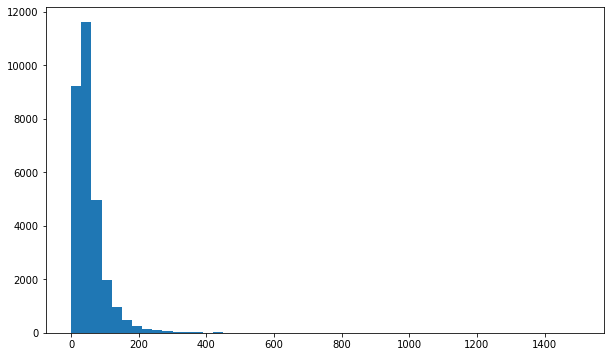

In [27]:
# Write your code here to visualise the data according to the 'Reviews' character length
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in sentiment['reviews']]
plt.hist(doc_lens, bins = 50)
plt.show()

#### Find the top 50 words by frequency among all the articles after processing the text.

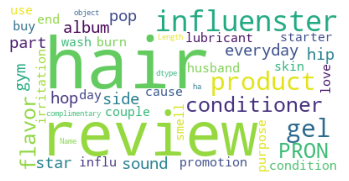

In [28]:
#Using a word cloud find the top 50 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
stoplist = set(stopwords.words("english"))


wordcloud = WordCloud(stopwords=stoplist,max_words=50, background_color='white').generate(str(sentiment['reviews'] ))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();


In [29]:
#Removing -PRON- from the text corpus
sentiment['reviews']  = sentiment['reviews'] .str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the reviews after processing the text.

In [30]:
#Write your code here to find the top 30 unigram frequency among the reviews in the cleaned dataframe(sentiment). 
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1, 1), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    #print(bag_of_words)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(sentiment['reviews'] , 30)

In [31]:
#Print the top 10 words in the unigram frequency
df_unigram = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
df_unigram.iloc[:10,:]

,unigram,count
0,product,12658
1,movie,10269
2,review,9275
3,promotion,8746
4,wipe,6107
5,hair,4806
6,clorox,4603
7,love,4034
8,use,3287
9,time,2880


In [32]:
#Write your code here to find the top 30 bigram frequency among the reviews in the cleaned datafram(sentiment). 
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    #print(bag_of_words)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(sentiment['reviews'] , 30)

In [33]:
#Print the top 10 words in the bigram frequency
df_bigram = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
df_bigram.iloc[:10,:]

,bigram,count
0,review promotion,8741
1,clorox wipe,2140
2,movie movie,1619
3,product product,1033
4,product review,832
5,clorox product,561
6,wipe review,532
7,product clorox,506
8,kitchen bathroom,433
9,product use,410


In [34]:
#Write your code here to find the top 30 trigram frequency among the reviews in the cleaned datafram(sentiment). 
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    #print(bag_of_words)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    #print("-31",words_freq)
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(sentiment['reviews'] , 30)

In [35]:
#Print the top 10 words in the trigram frequency
df_trigram = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
df_trigram.iloc[:10,:]

,trigram,count
0,product review promotion,771
1,wipe review promotion,532
2,clorox disinfect wipe,286
3,house review promotion,280
4,opinion review promotion,272
5,smell review promotion,248
6,hair review promotion,229
7,product clorox wipe,227
8,clorox review promotion,225
9,mess review promotion,213


In [36]:
#Create the dictionary for Sentiment

Sentiment_type = {"Negative":0,
               "Positive":1}
               
#Replace Topics with Topic Names
sentiment['user_sentiment'] = sentiment['user_sentiment'].map(Sentiment_type)

In [37]:
sentiment

,name,reviews_username,reviews_rating,reviews_date,reviews,user_sentiment,unique_id
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,5,2012-11-30T06:21:45.000Z,album hip hop side pop sound everyday gym star...,1,1
1,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,2017-07-09T00:00:00.000Z,flavor review part promotion,1,2
2,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,2017-07-09T00:00:00.000Z,flavor,1,3
3,K-Y Love Sensuality Pleasure Gel,rebecca,1,2016-01-06T00:00:00.000Z,review couple lubricant review starter boyfri...,0,4
4,K-Y Love Sensuality Pleasure Gel,walker557,1,2016-12-21T00:00:00.000Z,husband gel gel cause irritation burn skin gel,0,5
...,...,...,...,...,...,...,...
29995,L'or233al Paris Elvive Extraordinary Clay Reba...,laurasnchz,5,2017-01-23T00:00:00.000Z,conditioner influenster love hair end hair me...,1,29996
29996,L'or233al Paris Elvive Extraordinary Clay Reba...,scarlepadilla,5,2017-01-27T00:00:00.000Z,review purpose influenster hair,1,29997
29997,L'or233al Paris Elvive Extraordinary Clay Reba...,liviasuexo,5,2017-01-21T00:00:00.000Z,hair use smell product wash hair product influ...,1,29998
29998,L'or233al Paris Elvive Extraordinary Clay Reba...,ktreed95,5,2017-01-11T00:00:00.000Z,hair influenster conditioner hair hair day buy...,1,29999


In [38]:
#Assign nan in place of blanks in the reviews column
sentiment[sentiment['reviews']== ''] = np.nan 
#Remove all rows where reviews column is nan
sentiment=sentiment[sentiment['reviews'].notnull()]

In [39]:
sentiment.to_csv('sentiment_premodel.csv', index=False)

In [40]:
## Code for internal purpose to reduce the execution time while working on capstone project--commented
sentiment = pd.read_csv('sentiment_premodel.csv')
sentiment.user_sentiment=sentiment.user_sentiment.astype('int')
sentiment.unique_id=sentiment.unique_id.astype('int')
sentiment.reviews_rating=sentiment.reviews_rating.astype('int')
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29612 entries, 0 to 29611
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              29612 non-null  object
 1   reviews_username  29612 non-null  object
 2   reviews_rating    29612 non-null  int64 
 3   reviews_date      29612 non-null  object
 4   reviews           29612 non-null  object
 5   user_sentiment    29612 non-null  int64 
 6   unique_id         29612 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.6+ MB


In [41]:
sentiment['user_sentiment'].value_counts()

1    26310
0     3302
Name: user_sentiment, dtype: int64

## Supervised model to predict user sentiment to the relevant reviews.

Since we will be using supervised learning technique we have to convert the user sentiment to numbers(numpy arrays only understand numbers)

Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the reviews"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 reviews"

**ngram** is splitting as bigram (two words) and consider their combined weight

In [42]:
#Write your code here to initialise the TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
# Transform word vector in tfidf vector
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2,ngram_range=(2,2))
X_train_tfidf = vectorizer.fit_transform(sentiment['reviews']) 

We will atleast build 3 models on the train & test data from these options:
* Logistic regression
* XGBoost
* Random Forest
* Naive Bayes

**We will do evaluation metrics judge to the tried models and select the ones performing the best**

In [43]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_tr, X_test, y_tr, y_test = train_test_split(X_train_tfidf, sentiment['user_sentiment'], test_size=0.25, random_state=42,stratify=sentiment['user_sentiment'])

print(f"Shape of X_train: {x_tr.shape}")
print(f"Shape of y_train: {y_tr.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (22209, 22639)
Shape of y_train: (22209,)
Shape of X_test: (7403, 22639)
Shape of y_test: (7403,)


## Handling sentiment imbalance

In [44]:
## Sentiment rate
sentiment['user_sentiment'].value_counts(normalize=True)

1    0.888491
0    0.111509
Name: user_sentiment, dtype: float64

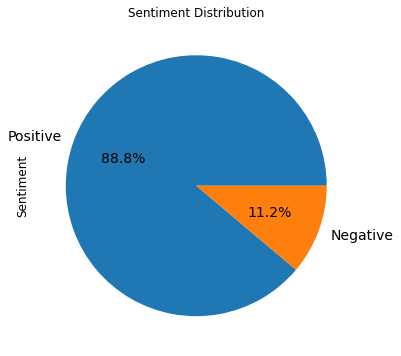

In [45]:
#Sentiment Distribution
pie_chart = sentiment['user_sentiment'].value_counts()*100.0 /len(sentiment)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['Positive', 'Negative'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Sentiment',fontsize = 12)
ax.set_title('Sentiment Distribution', fontsize = 12)
plt.show()

### Inference: 
       There is class imbalance. Only 11% have negative sentiment and 91% positive sentiment

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train,y_train = smote.fit_resample(x_tr,y_tr)

# Model Selection

In [47]:
#importing model and metrics related libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import pickle

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [49]:
#Building all suggested models
logi_base = LogisticRegression(random_state=42)
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1, random_state=42)
bnb = BernoulliNB()
xgb_model = xgb.XGBClassifier(random_state=42)
cv_dict = {0: 'Logistic Regression', 1: 'Random Forest',2:'Naive Bayes',3:'XGBoost'}
cv_models=[logi_base,rf,bnb,xgb_model]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X_train, y_train, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8102178626044969
Random Forest Test Accuracy: 0.6782052836166381
Naive Bayes Test Accuracy: 0.8291700433686027
XGBoost Test Accuracy: 0.6506627667070181


### Let us try all the models with hyperparameter tuning to select best performing model.

## Logistic Regression with Hyperparameter

In [50]:
logi_base = LogisticRegression(random_state=42)
params = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}

grid_search = GridSearchCV(estimator=logi_base,
                           param_grid=params,
                           cv = 10,
                           n_jobs=-1, verbose=1, scoring='accuracy')

In [51]:
%%time
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
CPU times: user 6.17 s, sys: 4.33 s, total: 10.5 s
Wall time: 1min 15s


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [52]:
logi_best = grid_search.best_estimator_
logi_best

LogisticRegression(C=6866.488450042998, random_state=42)

## Evaluation Score

In [53]:
y_train_pred = logi_best.predict(X_train)
y_test_pred = logi_best.predict(X_test)

Confusion matrix, without normalization


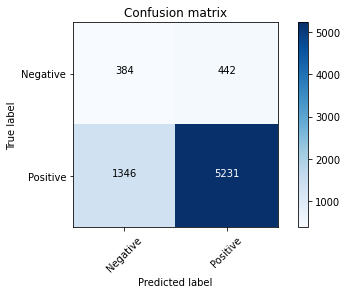

In [54]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, classes=['Negative','Positive'])

In [55]:
target_names = ["Negative-Sentiment","Positive-Sentiment"]
print(classification_report(y_test, y_test_pred,target_names=target_names))

                    precision    recall  f1-score   support

Negative-Sentiment       0.22      0.46      0.30       826
Positive-Sentiment       0.92      0.80      0.85      6577

          accuracy                           0.76      7403
         macro avg       0.57      0.63      0.58      7403
      weighted avg       0.84      0.76      0.79      7403



In [56]:
print('AUC on train data by Logistic Regression =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=logi_best.predict_proba(X_train)[:, 1]))

print('AUC on test data by Logistic Regression =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=logi_best.predict_proba(X_test)[:, 1]))

AUC on train data by Logistic Regression = 0.9814215951810878
AUC on test data by Logistic Regression = 0.6943433367656973


## Random Forest with Hyperparameter tuning

In [57]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 10,
                           n_jobs=-1, verbose=1, scoring='accuracy')

In [58]:
%%time
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
CPU times: user 15.7 s, sys: 1.26 s, total: 17 s
Wall time: 5min 11s


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [59]:
grid_search.best_score_

0.6782052836166381

In [60]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

## Evalution Score of Random Forest with Hyperparameter Tuning

In [61]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)
print(classification_report(y_test, y_test_pred,target_names=target_names))

                    precision    recall  f1-score   support

Negative-Sentiment       0.15      0.64      0.24       826
Positive-Sentiment       0.92      0.53      0.68      6577

          accuracy                           0.54      7403
         macro avg       0.53      0.59      0.46      7403
      weighted avg       0.84      0.54      0.63      7403



Confusion matrix, without normalization


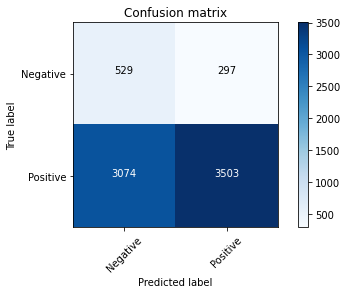

In [62]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, classes=['Negative','Positive'])

In [63]:
print('AUC on train data by Random Forest with Hyperparameter Tuning =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=rf_best.predict_proba(X_train)[:, 1]))

print('AUC on test data by Random Forest with Hyperparameter Tuning=', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=rf_best.predict_proba(X_test)[:, 1]))

AUC on train data by Random Forest with Hyperparameter Tuning = 0.774769123045277
AUC on test data by Random Forest with Hyperparameter Tuning= 0.6281055560484644


# Naive Bayes

In [64]:
bnb = BernoulliNB()

In [65]:
%%time
bnb_best=bnb.fit(X_train, y_train)

CPU times: user 11.9 ms, sys: 55 µs, total: 12 ms
Wall time: 11.4 ms


### Check accuracy score

In [66]:
y_train_pred = bnb_best.predict(X_train)
y_test_pred = bnb_best.predict(X_test)
print(classification_report(y_test, y_test_pred,target_names=target_names))

                    precision    recall  f1-score   support

Negative-Sentiment       0.21      0.54      0.31       826
Positive-Sentiment       0.93      0.75      0.83      6577

          accuracy                           0.73      7403
         macro avg       0.57      0.65      0.57      7403
      weighted avg       0.85      0.73      0.77      7403



Confusion matrix, without normalization


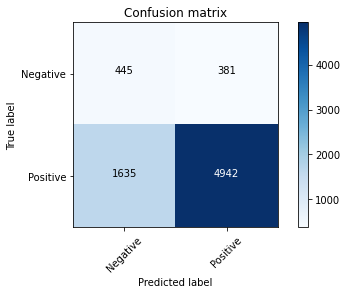

In [67]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, classes=['Negative','Positive'])

In [68]:
print('AUC on train data by Naive Bayes  =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=bnb_best.predict_proba(X_train)[:, 1]))

print('AUC on test data by Naive Bayes=', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=bnb_best.predict_proba(X_test)[:, 1]))

AUC on train data by Naive Bayes  = 0.9451255944762544
AUC on test data by Naive Bayes= 0.7115812091517104


# XGBoost with Hyperparameter tuning

In [69]:
xgb_model = xgb.XGBClassifier(random_state=42, n_jobs=-2)


parameters = {'learning_rate': [0.1,0.2,0.3],
              'max_depth': [2,3,5,10,20],
              'min_child_weight': [1],
              'n_estimators': [10, 25, 50, 100]}

clf_xgb = GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-2,
                                       cv=10,
                                       scoring='accuracy',
                                       verbose=1,
                                       refit=True)

In [70]:
%%time
clf_xgb.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
CPU times: user 33.9 s, sys: 1.36 s, total: 35.2 s
Wall time: 22min 34s


GridSearchCV(cv=10, estimator=XGBClassifier(n_jobs=-2, random_state=42),
             n_jobs=-2,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_child_weight': [1],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [71]:
### Applying the best model as per gridsearch
xg_best = clf_xgb.best_estimator_
xg_best

XGBClassifier(learning_rate=0.3, max_depth=20, n_jobs=-2, random_state=42)

## Evalution Score of XGBoost with Hyperparameter Tuning

In [72]:
y_train_pred = xg_best.predict(X_train)
y_test_pred = xg_best.predict(X_test)
print(classification_report(y_test, y_test_pred,target_names=target_names))

                    precision    recall  f1-score   support

Negative-Sentiment       0.16      0.56      0.25       826
Positive-Sentiment       0.92      0.64      0.76      6577

          accuracy                           0.63      7403
         macro avg       0.54      0.60      0.51      7403
      weighted avg       0.84      0.63      0.70      7403



Confusion matrix, without normalization


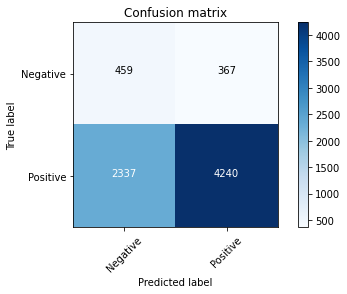

In [73]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, classes=['Negative','Positive'])

In [74]:
print('AUC on train data by XGBoost with Hyperparameter Tuning  =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=xg_best.predict_proba(X_train)[:, 1]))

print('AUC on test data by XGBoost with Hyperparameter Tuning=', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xg_best.predict_proba(X_test)[:, 1]))

AUC on train data by XGBoost with Hyperparameter Tuning  = 0.9277086409090164
AUC on test data by XGBoost with Hyperparameter Tuning= 0.6455749013088019


## Saving all the Sentiment model into a file

#### Naive Bayes BernoulliNB model performs better with good AUC and accuracy on test data

In [75]:
filename = 'logi_model.sav'
pickle.dump(logi_best, open(filename, 'wb'))

filename = 'rf_model.sav'
pickle.dump(rf_best, open(filename, 'wb'))

filename = 'bnb_model.sav'
pickle.dump(bnb_best, open(filename, 'wb'))

filename = 'xg_model.sav'
pickle.dump(xg_best, open(filename, 'wb'))

# Building the Recommendation Model


#### Below tasks are performed
- User based recommendation
- User based prediction & evaluation
- Item based recommendation
- Item based prediction & evaluation

In [76]:
sentiment.head()

,name,reviews_username,reviews_rating,reviews_date,reviews,user_sentiment,unique_id
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,5,2012-11-30T06:21:45.000Z,album hip hop side pop sound everyday gym star...,1,1
1,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,2017-07-09T00:00:00.000Z,flavor review part promotion,1,2
2,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,2017-07-09T00:00:00.000Z,flavor,1,3
3,K-Y Love Sensuality Pleasure Gel,rebecca,1,2016-01-06T00:00:00.000Z,review couple lubricant review starter boyfri...,0,4
4,K-Y Love Sensuality Pleasure Gel,walker557,1,2016-12-21T00:00:00.000Z,husband gel gel cause irritation burn skin gel,0,5


In [77]:
#Creating unique id's for user and product
user_dict={}
j=1
for i in sentiment['reviews_username'].unique():
  user_dict[i]=j
  j=j+1

prd_dict={}
j=1
for i in sentiment['name'].unique():
  prd_dict[i]=j
  j=j+1

In [78]:
#Creating new columns to the dataframe with unique id's
sentiment['product_id']=sentiment['name'].map(prd_dict)
sentiment['user_id']=sentiment['reviews_username'].map(user_dict)

In [79]:
sentiment['reviews_rating']=sentiment['reviews_rating'].astype('float')

In [80]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29612 entries, 0 to 29611
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              29612 non-null  object 
 1   reviews_username  29612 non-null  object 
 2   reviews_rating    29612 non-null  float64
 3   reviews_date      29612 non-null  object 
 4   reviews           29612 non-null  object 
 5   user_sentiment    29612 non-null  int64  
 6   unique_id         29612 non-null  int64  
 7   product_id        29612 non-null  int64  
 8   user_id           29612 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 2.0+ MB


In [81]:
#Creating distinct user and product dataframe
productdf=sentiment.groupby(['product_id','name']).size().reset_index(name='NoOfReviews')
userdf=sentiment.groupby(['user_id','reviews_username']).size().reset_index(name='NoOfReviews')

## Dividing the dataset into train and test

In [82]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(sentiment, test_size=0.30, random_state=31)

In [83]:
print(train.shape)
print(test.shape)

(20728, 9)
(8884, 9)


In [84]:
# Pivot the train ratings' dataset into matrix format in which columns are products and the rows are user IDs.
df_pivot = train.pivot_table(
    index='user_id',
    columns='product_id',
    values='reviews_rating'
).fillna(0)

df_pivot.head(3)

product_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,...,227,228,229,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,255,256,257,258,259,260,261,262,263,264,265,266,267,268
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


### Creating dummy train & dummy test dataset
These dataset will be used for prediction 
- Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction. The products not rated by user is marked as 1 for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the product rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [85]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [86]:
# The movies not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [87]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(
    index='user_id',
    columns='product_id',
    values='reviews_rating'
).fillna(1)

In [88]:
dummy_train.head()

product_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,...,227,228,229,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,255,256,257,258,259,260,261,262,263,264,265,266,267,268
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different products.



# User Similarity Matrix

## Using Cosine Similarity

In [89]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [90]:
user_correlation.shape

(18060, 18060)

## Using adjusted Cosine 

### Here, we are not removing the NaN values and calculating the mean only for the product rated by the user

In [91]:
# Create a user-product matrix.
df_pivot = train.pivot_table(
    index='user_id',
    columns='product_id',
    values='reviews_rating'
)

In [92]:
df_pivot.head()

product_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,...,227,228,229,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,255,256,257,258,259,260,261,262,263,264,265,266,267,268
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the product for each user around 0 mean

In [93]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [94]:
df_subtracted.head()

product_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,...,227,228,229,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,255,256,257,258,259,260,261,262,263,264,265,266,267,268
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,-3.000000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,-2.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [95]:
from sklearn.metrics.pairwise import pairwise_distances

In [96]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Prediction - User User

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [97]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset). 

In [98]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[5.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.87625405, ..., 0.        , 5.        ,
        0.75592895],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [99]:
user_predicted_ratings.shape

(18060, 254)

Since we are interested only in the product not rated by the user, we will ignore the product rated by the user by making it zero. 

In [100]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

product_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,...,227,228,229,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,255,256,257,258,259,260,261,262,263,264,265,266,267,268
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,5.692725,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,3.651484,0.0,0.0,0.0,0.0,0.000000,3.651484,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.229758,0.0,0.0,0.0,0.0,0.0,0.755929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.247047,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.298807,0.0,1.101469,0.0,5.948887,0.0,0.0,0.0,0.0,...,5.935620,0.0,0.0,0.000000,0.555653,0.0,0.648265,0.566947,0.0,0.0,3.273268,1.079425,0.0,0.000000,0.0,0.0,0.0,0.0,0.534522,1.322299,0.062171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.545545,0.0,0.0,0.0,0.0,0.0,0.000000,0.755929
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,3.273268,0.821966,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.203967,0.31497,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,16.941432,0.0,0.0,0.271956,0.605228,0.0,0.589256,0.000000,0.0,0.0,3.887245,4.281416,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,6.823585,0.189934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09245,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,3.273268,1.154701


### Finding the top 20 recommendation for the *user*

In [101]:
# Take the user ID as input.
user_input = int(input("Enter your user name"))
print(user_input)

Enter your user name1
1


In [102]:
user_final_rating.head(2)

product_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,...,227,228,229,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,255,256,257,258,259,260,261,262,263,264,265,266,267,268
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.692725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.651484,0.0,0.0,0.0,0.0,0.0,3.651484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

product_id
227    5.692725
43     5.284477
80     4.519745
91     4.350643
241    3.651484
247    3.651484
113    2.886751
98     2.041241
96     2.041241
88     0.000000
92     0.000000
93     0.000000
94     0.000000
95     0.000000
90     0.000000
97     0.000000
89     0.000000
268    0.000000
99     0.000000
86     0.000000
Name: 1, dtype: float64

In [104]:
user_user = pd.merge(d,productdf,on='product_id', how = 'inner')
user_user

,product_id,1,name,NoOfReviews
0,227,5.692725,Godzilla 3d Includes Digital Copy Ultraviolet ...,3311
1,43,5.284477,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,657
2,80,4.519745,The Resident Evil Collection 5 Discs (blu-Ray),843
3,91,4.350643,Clorox Disinfecting Wipes Value Pack Scented 1...,8517
4,241,3.651484,Meguiar's Ultimate Quik Detailer 22-Oz.,29
5,247,3.651484,Planes: Fire Rescue (2 Discs) (includes Digita...,1140
6,113,2.886751,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",84
7,98,2.041241,"Lysol Concentrate Deodorizing Cleaner, Origina...",152
8,96,2.041241,Chester's Cheese Flavored Puffcorn Snacks,165
9,88,0.000000,Red (special Edition) (dvdvideo),667


# Evaluation - User User 

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user. 

In [105]:
# Find out the common users of test and train dataset.
common = test[test.user_id.isin(train.user_id)]
common.shape

(1970, 9)

In [106]:
common.head()

,name,reviews_username,reviews_rating,reviews_date,reviews,user_sentiment,unique_id,product_id,user_id
21971,Alex Cross (dvdvideo),bob1,4.0,2015-02-18T00:00:00.000Z,tyler perry thriller detective perry homicide ...,0,22273,222,4716
13725,Clorox Disinfecting Wipes Value Pack Scented 1...,lizmomof8,5.0,2015-01-22T00:00:00.000Z,clorox wipe kitchen bathroomi review part prom...,1,13876,91,7983
19087,Clorox Disinfecting Bathroom Cleaner,angiesmessykids,5.0,2012-01-21T00:00:00.000Z,deal kid mess,1,19321,183,7568
24416,Godzilla 3d Includes Digital Copy Ultraviolet ...,besty,5.0,2016-09-19T00:00:00.000Z,monster version broderick movie version cgi ef...,1,24744,227,2050
3015,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,monkey,5.0,2016-10-02T00:00:00.000Z,follow movie comedy thing movie,1,3059,43,2815


In [107]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='user_id', columns='product_id', values='reviews_rating')

In [108]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [109]:
df_subtracted.head(1)

product_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,...,227,228,229,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,255,256,257,258,259,260,261,262,263,264,265,266,267,268
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
user_correlation_df['user_id'] = df_subtracted.index
user_correlation_df.set_index('user_id',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,18020,18021,18022,18023,18024,18025,18026,18027,18028,18029,18030,18031,18032,18033,18034,18035,18036,18037,18038,18039,18040,18041,18042,18043,18044,18045,18046,18047,18048,18049,18050,18051,18052,18053,18054,18055,18056,18057,18058,18059
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.000000,0.0,0.654654,0.0,0.566947,0.0,0.0,0.0,0.0,0.654654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.654654,0.0,1.000000,0.0,0.577350,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
common.head(1)

,name,reviews_username,reviews_rating,reviews_date,reviews,user_sentiment,unique_id,product_id,user_id
21971,Alex Cross (dvdvideo),bob1,4.0,2015-02-18T00:00:00.000Z,tyler perry thriller detective perry homicide ...,0,22273,222,4716


In [112]:
list_name = common.user_id.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()


user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [113]:
user_correlation_df_1.shape

(1674, 18060)

In [114]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [115]:
user_correlation_df_3 = user_correlation_df_2.T

In [116]:
user_correlation_df_3.head()

,1,3,7,8,10,13,25,28,31,35,45,75,115,125,188,189,191,269,290,294,356,401,412,443,491,594,595,605,636,675,676,681,682,688,692,698,701,726,749,750,...,24265,24267,24269,24270,24271,24274,24276,24277,24278,24279,24284,24286,24289,24290,24291,24295,24296,24299,24301,24304,24309,24316,24317,24318,24323,24326,24330,24341,24342,24343,24344,24348,24349,24351,24352,24363,24368,24379,24390,24391
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.000000,0.566947,0.0,0.0,0.654654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231455,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.566947,1.000000,0.0,0.0,0.577350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
user_correlation_df_3.shape

(1674, 1674)

In [118]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [119]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='user_id', columns='product_id', values='reviews_rating').fillna(0)

In [120]:
dummy_test.shape

(1674, 112)

In [121]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [122]:
common_user_predicted_ratings.head(2)

product_id,3,6,7,8,12,13,14,16,21,22,23,24,31,33,35,37,43,45,46,48,55,57,58,62,65,68,69,70,71,73,74,80,84,85,88,89,90,91,92,93,...,178,180,183,188,192,194,200,201,203,204,207,209,210,214,218,220,222,223,224,225,226,227,231,232,234,236,238,239,241,243,246,247,250,257,261,262,264,265,267,268
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.236228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.239203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [123]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [124]:
common_ = common.pivot_table(index='user_id', columns='product_id', values='reviews_rating')

In [125]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [126]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.456020754022011


## Using Item similarity

# Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different product ID. In the user based similarity, we had taken mean for each user instead of each product. 

In [127]:
df_pivot = train.pivot_table(
    index='user_id',
    columns='product_id',
    values='reviews_rating'
).T

df_pivot.head()

user_id,1,2,3,4,5,6,7,8,9,10,11,13,14,16,17,18,19,20,21,23,24,25,27,28,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,...,24636,24637,24638,24640,24643,24644,24646,24647,24648,24651,24652,24653,24654,24655,24656,24660,24662,24664,24665,24666,24667,24668,24669,24671,24674,24676,24677,24678,24679,24680,24681,24682,24684,24685,24686,24688,24689,24691,24692,24694
product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the movie rating for each product for using the Adujsted Cosine

In [128]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [129]:
df_subtracted.head()

user_id,1,2,3,4,5,6,7,8,9,10,11,13,14,16,17,18,19,20,21,23,24,25,27,28,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,...,24636,24637,24638,24640,24643,24644,24646,24647,24648,24651,24652,24653,24654,24655,24656,24660,24662,24664,24665,24666,24667,24668,24669,24671,24674,24676,24677,24678,24679,24680,24681,24682,24684,24685,24686,24688,24689,24691,24692,24694
product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,-1.571429,-1.571429,-1.571429,-1.571429,-1.571429,NaN,-1.571429,-1.571429,-1.571429,-1.571429,-1.571429,-1.571429,0.428571,0.428571,1.428571,1.428571,1.428571,2.428571,2.428571,2.428571,2.428571,2.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.75,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity using pairwise distances approach

In [130]:
from sklearn.metrics.pairwise import pairwise_distances

In [131]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [132]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Prediction - Item Item

In [133]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.0663109 , ..., 0.        , 0.        ,
        0.00527241],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        5.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        5.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        5.        ]])

In [134]:
item_predicted_ratings.shape

(18060, 254)

In [135]:
dummy_train.shape

(18060, 254)

### Filtering the rating only for the products not rated by the user for recommendation

In [136]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

product_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,...,227,228,229,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,255,256,257,258,259,260,261,262,263,264,265,266,267,268
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.016582,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002604,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.014395,0.0,0.0,0.0,0.011224,0.0,0.019612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007493,0.0,0.00124,0.0,0.014773,0.0,0.01056,0.0,0.0,0.022624,0.0,...,0.010008,0.0,0.0,0.0,0.035744,0.0,0.000000,0.0,0.0,0.0,0.014907,0.020923,0.0,0.0,0.0,0.0,0.0,0.0,0.010246,0.010260,0.007513,0.0,0.0,0.0,0.0,0.0,0.0,0.012375,0.017080,0.012227,0.0,0.0,0.024148,0.0,0.0,0.0,0.0,0.0,0.0,0.005272
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.002129,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.014907,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.004716,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.047376,0.0,...,0.018460,0.0,0.0,0.0,0.062522,0.0,0.028191,0.0,0.0,0.0,0.014907,0.036036,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.004115,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.011194,0.099296,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.005888


### Finding the top 20 recommendation for the *user*



In [137]:
# Take the user ID as input
user_input = int(input("Enter your user name"))
print(user_input)

Enter your user name5
5


In [138]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

product_id
43     0.232955
180    0.179334
258    0.099296
232    0.062522
56     0.054421
146    0.053103
225    0.051719
41     0.047376
88     0.044691
161    0.044292
89     0.039704
239    0.036036
58     0.032847
203    0.030431
191    0.029395
178    0.029229
234    0.028191
119    0.028166
71     0.024344
137    0.024105
Name: 5, dtype: float64

In [139]:
item_item = pd.merge(d,productdf,on='product_id',how = 'inner')
item_item

,product_id,5,name,NoOfReviews
0,43,0.232955,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,657
1,180,0.179334,Equals (blu-Ray),13
2,258,0.099296,Queen Helene Cocoa Butter Solid,8
3,232,0.062522,Stargate (ws) (ultimate Edition) (director's C...,186
4,56,0.054421,Chex Muddy Buddies Brownie Supreme Snack Mix,24
5,146,0.053103,Bilbao Nightstand Gray Oak - South Shore,6
6,225,0.051719,Bisquick Original Pancake And Baking Mix - 40oz,94
7,41,0.047376,Hawaiian Punch Berry Limeade Blast Juice,19
8,88,0.044691,Red (special Edition) (dvdvideo),667
9,161,0.044292,Pleasant Hearth Diamond Fireplace Screen - Esp...,31


In [140]:
train_new = pd.merge(train,productdf,on='product_id',how='inner')
train_new[train_new.user_id == 1] .head()

,name_x,reviews_username,reviews_rating,reviews_date,reviews,user_sentiment,unique_id,product_id,user_id,name_y,NoOfReviews
12585,Dark Shadows (includes Digital Copy) (ultravio...,joshua,3.0,2016-06-13T00:00:00.000Z,movie,0,1560,35,1,Dark Shadows (includes Digital Copy) (ultravio...,245
14806,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,5.0,2012-11-30T06:21:45.000Z,album hip hop side pop sound everyday gym star...,1,1,1,1,Pink Friday: Roman Reloaded Re-Up (w/dvd),1
20240,Smead174 Recycled Letter Size Manila File Back...,joshua,5.0,2013-07-30T07:00:00.000Z,file folder file company file fastner year fil...,1,17860,128,1,Smead174 Recycled Letter Size Manila File Back...,2


# Evaluation - Item Item

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user. 

In [141]:
test.columns

Index(['name', 'reviews_username', 'reviews_rating', 'reviews_date', 'reviews',
       'user_sentiment', 'unique_id', 'product_id', 'user_id'],
      dtype='object')

In [142]:
common =  test[test.product_id.isin(train.product_id)]
common.shape

(8869, 9)

In [143]:
common.head(4)

,name,reviews_username,reviews_rating,reviews_date,reviews,user_sentiment,unique_id,product_id,user_id
28422,Mrs. Meyer's Lemon Verbena Surface Scrub,suzy,5.0,2014-06-16T00:00:00.000Z,shower stall stain cleanser ajax bleach stain ...,0,28811,267,23915
784,Windex Original Glass Cleaner Refill 67.6oz (2...,cajunsouschef,4.0,2015-01-05T00:00:00.000Z,version windex volume spray bottle price spray...,1,785,8,765
12583,Clorox Disinfecting Wipes Value Pack Scented 1...,jackie1973,5.0,2012-01-26T00:00:00.000Z,love house smell,1,12732,91,11494
21971,Alex Cross (dvdvideo),bob1,4.0,2015-02-18T00:00:00.000Z,tyler perry thriller detective perry homicide ...,0,22273,222,4716


In [144]:
common_item_based_matrix = common.pivot_table(index='user_id', columns='product_id', values='reviews_rating').T

In [145]:
common_item_based_matrix.shape

(194, 8295)

In [146]:
item_correlation_df = pd.DataFrame(item_correlation)

In [147]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
item_correlation_df['product_id'] = df_subtracted.index
item_correlation_df.set_index('product_id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253
product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.282555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
list_name = common.product_id.tolist()

In [150]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [151]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [152]:
item_correlation_df_3.head()

,3,4,6,7,8,10,11,12,13,14,15,16,20,21,22,23,24,25,29,30,31,32,33,34,35,36,37,41,42,43,44,45,46,47,48,50,55,56,57,58,...,219,220,221,222,223,224,225,226,227,229,231,232,234,235,236,237,238,239,240,241,242,243,245,246,247,248,250,252,255,256,257,258,260,261,262,263,264,265,267,268
product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.015455,0.0,0.002129,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.014907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.001785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.004525,0.0,0.001275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000708,0.0,0.0,0.00316,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000413,0.001503,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007293,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005955,0.0,0.0,...,0.0,0.001792,0.0,0.0,0.010757,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.002534,0.0,0.0,0.0,0.078055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings


array([[0.        , 0.        , 0.00851555, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 5.        , 5.        ,
        5.        ]])

In [154]:
common_item_predicted_ratings.shape

(194, 8295)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train



In [155]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='user_id', columns='product_id', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.


In [156]:
common_ = common.pivot_table(index='user_id', columns='product_id', values='reviews_rating').T

In [157]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ...  1.  1.  1.]]


In [158]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [159]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5511721948769273


# Recommending top 5 products based on best performing reccommendation system

### In our case it is User-User Recommendation system with low RMSE 2.42

In [160]:
prod_prediction=sentiment[sentiment.product_id.isin(user_user.product_id)]
prod_prediction

,name,reviews_username,reviews_rating,reviews_date,reviews,user_sentiment,unique_id,product_id,user_id
2548,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,jody,1.0,2016-07-18T00:00:00.000Z,disappointment skip family see time let humor...,1,2584,43,899
2549,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,bkrdr247,1.0,2016-07-23T00:00:00.000Z,movie critic disappointment case sequel,0,2585,43,2417
2550,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,moviefan111,1.0,2016-08-05T00:00:00.000Z,cable movie,0,2586,43,2418
2551,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,ebony,1.0,2016-08-12T00:00:00.000Z,device,0,2587,43,2419
2552,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,jessie,1.0,2016-08-19T00:00:00.000Z,film stick character daughter plot,0,2588,43,2420
...,...,...,...,...,...,...,...,...,...
29607,L'or233al Paris Elvive Extraordinary Clay Reba...,laurasnchz,5.0,2017-01-23T00:00:00.000Z,conditioner influenster love hair end hair me...,1,29996,268,24692
29608,L'or233al Paris Elvive Extraordinary Clay Reba...,scarlepadilla,5.0,2017-01-27T00:00:00.000Z,review purpose influenster hair,1,29997,268,24693
29609,L'or233al Paris Elvive Extraordinary Clay Reba...,liviasuexo,5.0,2017-01-21T00:00:00.000Z,hair use smell product wash hair product influ...,1,29998,268,24694
29610,L'or233al Paris Elvive Extraordinary Clay Reba...,ktreed95,5.0,2017-01-11T00:00:00.000Z,hair influenster conditioner hair hair day buy...,1,29999,268,24695


### Predicting sentiment for top 20 products based on best performing model Naive Bayes

In [161]:
#Testing model from file
filename = 'bnb_model.sav'
bnb_file = pickle.load(open(filename, 'rb'))

final_pred=vectorizer.transform(prod_prediction['reviews'])

prod_prediction['sentiment_predicted'] = bnb_file.predict(final_pred)
prod_prediction.head()

,name,reviews_username,reviews_rating,reviews_date,reviews,user_sentiment,unique_id,product_id,user_id,sentiment_predicted
2548,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,jody,1.0,2016-07-18T00:00:00.000Z,disappointment skip family see time let humor...,1,2584,43,899,1
2549,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,bkrdr247,1.0,2016-07-23T00:00:00.000Z,movie critic disappointment case sequel,0,2585,43,2417,0
2550,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,moviefan111,1.0,2016-08-05T00:00:00.000Z,cable movie,0,2586,43,2418,0
2551,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,ebony,1.0,2016-08-12T00:00:00.000Z,device,0,2587,43,2419,0
2552,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,jessie,1.0,2016-08-19T00:00:00.000Z,film stick character daughter plot,0,2588,43,2420,0


### Predicting top 5 products to the user based on sentiment model

In [162]:
final_prediction=prod_prediction.groupby(by=['name','sentiment_predicted'])[['name']].count()/prod_prediction.groupby(by='name')[['name']].count()*100
final_prediction

name
name                                               sentiment_predicted            
Avery174 Ready Index Contemporary Table Of Cont... 0                     21.070234
                                                   1                     78.929766
Bounce Dryer Sheets, Fresh Linen, 160 sheets       0                     57.142857
                                                   1                     42.857143
Chester's Cheese Flavored Puffcorn Snacks          0                     56.969697
                                                   1                     43.030303
Chips Deluxe Soft 'n Chewy Cookies                 0                    100.000000
Clorox Disinfecting Wipes Value Pack Scented 15... 0                     22.413996
                                                   1                     77.586004
Colorganics Lipstick, Cayenne                      0                     75.000000
                                                   1                     25.000000
Coola Organic Sunscreen Classic Face Cucumber S... 0                     50.000000
                                                   1                     50.000000
D-Con Mice Bait Station - 3ct                      0                     83.333333
                                                   1                     16.666667
Godzilla 3d Includes Digital Copy Ultraviolet 3... 0                     23.497433
                                                   1                     76.502567
Hormel Chili, No Beans                             0                     64.327485
                                                   1                     35.672515
L'or233al Paris Elvive Extraordinary Clay Rebal... 0                      2.445194
                                                   1                     97.554806
Lysol Concentrate Deodorizing Cleaner, Original... 0                     40.789474
                                                   1                     59.210526
Meguiar's Ultimate Quik Detailer 22-Oz.            0                     48.275862
                                                   1                     51.724138
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Dig... 0                     30.289193
                                                   1                     69.710807
Orajel Maximum Strength Toothache Pain Relief L... 0                     34.782609
                                                   1                     65.217391
Planes: Fire Rescue (2 Discs) (includes Digital... 0                     20.438596
                                                   1                     79.561404
Red (special Edition) (dvdvideo)                   0                     20.839580
                                                   1                     79.160420
Tai Pei Sweet & Sour Chicken                       0                     68.421053
                                                   1                     31.578947
The Resident Evil Collection 5 Discs (blu-Ray)     0                     44.721234
                                                   1                     55.278766
WeatherTech 40647 14-15 Outlander Cargo Liners ... 0                     54.545455
                                                   1                     45.454545

In [163]:
final_prediction=final_prediction.rename(columns={'name':'percent'})
final_prediction.reset_index(inplace=True)

In [164]:
top_5_products=final_prediction[final_prediction.sentiment_predicted==1].sort_values('percent',ascending=False)[0:5][['name']]

In [165]:
top_5_products

,name
20,L'or233al Paris Elvive Extraordinary Clay Reba...
30,Planes: Fire Rescue (2 Discs) (includes Digita...
32,Red (special Edition) (dvdvideo)
1,Avery174 Ready Index Contemporary Table Of Con...
8,Clorox Disinfecting Wipes Value Pack Scented 1...
